In [8]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # LabelEncodel converts categorical data into numerical data

In [9]:
data = pd.read_csv("./co2.csv")

In [10]:
data.isnull().sum()     # If any null values found then do "data.fillna(mean)"

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


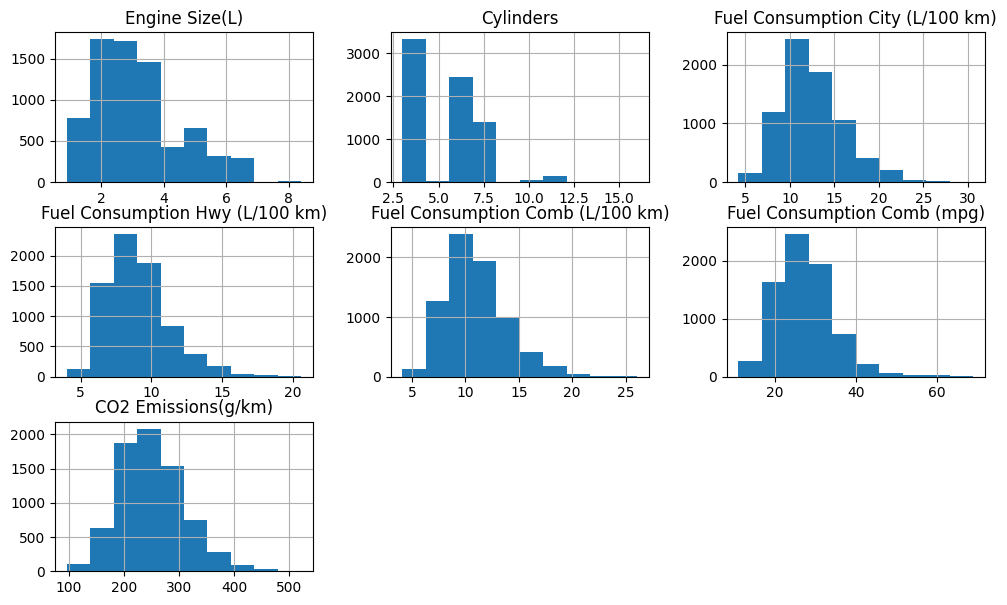

In [12]:
data.hist(figsize=(12, 7))
plt.show()

In [13]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
# Initialize LabelEncoders for categorical columns
encoders = {
    "Make": LabelEncoder(),
    "Model": LabelEncoder(),
    "Vehicle Class": LabelEncoder(),
    "Transmission": LabelEncoder(),
    "Fuel Type": LabelEncoder(),
}

# Fit encoders on the dataset
for column, encoder in encoders.items():
    encoders[column].fit(data[column])

# Save the fitted encoders to a file
with open("Encoders.pkl", "wb") as file:
    pkl.dump(encoders, file)

print("Encoders fitted and saved successfully.")

Encoders fitted and saved successfully.


In [15]:
# Label Encoding
label = LabelEncoder()  # It assigns a number to the text labels
data["Make"] = label.fit_transform(data["Make"])
data["Model"] = label.fit_transform(data["Model"])
data["Vehicle Class"] = label.fit_transform(data["Vehicle Class"])
data["Transmission"] = label.fit_transform(data["Transmission"])
data["Fuel Type"] = label.fit_transform(data["Fuel Type"])

In [16]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [17]:
# Sanderd Scalling
sc = StandardScaler()
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [18]:
# For scalling the columns of data
columnsToScale = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
data_sc = sc.fit_transform(data[columnsToScale])
data_sc_df = pd.DataFrame(data_sc, columns=columnsToScale)
data_sc_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,-1.730214,0.057785,-1.319720,-0.856721,-0.883408,-0.003824,0.836161,-0.759002,-1.052781,-0.855742,0.763110,-0.932933
1,-1.730214,0.057785,-1.319720,-0.561317,-0.883408,1.511325,0.836161,-0.387577,-0.603202,-0.475423,0.209966,-0.505646
2,-1.730214,0.059519,-1.319720,-1.225976,-0.883408,1.098102,0.836161,-1.873275,-1.457401,-1.754677,2.837400,-1.958421
3,-1.730214,0.362820,0.961192,0.251043,0.210575,0.133917,0.836161,0.040990,0.026208,0.043193,-0.343178,0.075464
4,-1.730214,0.823839,0.961192,0.251043,0.210575,0.133917,0.836161,-0.130437,-0.153624,-0.129679,-0.066606,-0.112542


In [19]:
data_sc_df.corr()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,0.012679,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Model,0.012679,1.000000,0.190713,0.070426,0.048399,-0.016260,-0.079554,0.101590,0.161755,0.123675,-0.098375,0.105847
Vehicle Class,-0.029558,0.190713,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.070426,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.048399,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.016260,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.079554,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.101590,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.161755,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.123675,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052


<Axes: >

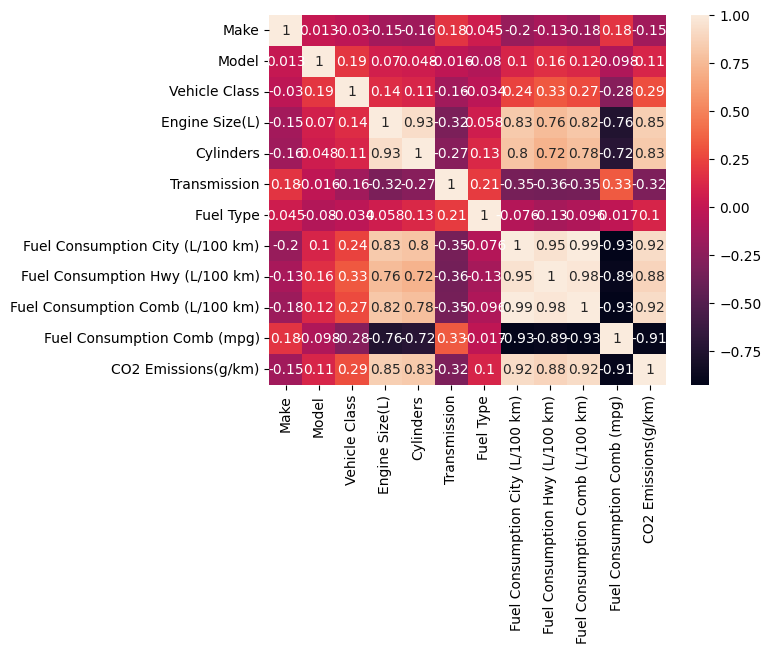

In [20]:
sns.heatmap(data_sc_df.corr(), annot=True)

In [21]:
x = data_sc_df.drop("CO2 Emissions(g/km)", axis= 'columns')
y = data['CO2 Emissions(g/km)']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [24]:
model = LinearRegression()
model1 = LogisticRegression()

In [25]:
model.fit(x_train, y_train)
model1.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
r2 = r2_score(y_pred, y_test)
r21 = r2_score(y_pred1, y_test)
print("r2_score for Linear Regression = ", r2)
print("r2_score for Logistic Regression = ", r21)

r2_score for Linear Regression =  0.9055973052781032
r2_score for Logistic Regression =  0.889710904600045


In [29]:
mae = mean_absolute_error(y_pred, y_test)
mae1 = mean_absolute_error(y_pred1, y_test)
print("mean_absolute_error for Linear Regression = ", mae)
print("mean_absolute_error for Logistic Regression = ", mae1)

mean_absolute_error for Linear Regression =  11.05816543944833
mean_absolute_error for Logistic Regression =  12.91832129963899


In [30]:
mse = mean_squared_error(y_pred, y_test)
mse1 = mean_squared_error(y_pred1, y_test)
print("mean_squared_error for Linear Regression = ", mse)
print("mean_squared_error for Logistic Regression = ", mse1)

mean_squared_error for Linear Regression =  293.39011084156317
mean_squared_error for Logistic Regression =  322.7468411552347


In [31]:
import pickle as pkl
with open("Model.pkl", "wb") as file:
    pkl.dump(model, file)

In [32]:
import my_package.Best_Model_and_Parameters
best_model = my_package.Best_Model_and_Parameters.get_best(x_train, y_train)
best_model

c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less

,model,best_score,best_params
0,svm,0.264459,"{'model__C': 20, 'model__gamma': 'auto', 'mode..."
1,random_forest,0.480364,{'model__n_estimators': 10}
2,logistic_regression,0.089186,"{'model__C': 10, 'model__solver': 'liblinear'}"
3,decision_tree,0.489457,{'model__splitter': 'random'}
4,gaussian_NB,0.138906,{}
